In [1]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import datetime
import matplotlib.dates as mdates

plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (17,6)

In [2]:
df = pd.read_json('/Users/olivianystrom/Desktop/Springboard/ultimate_challenge/logins.json')
df = pd.DataFrame(df)
df.shape

(93142, 1)

In [3]:
df['quantity'] = 1
df['login_time'] = pd.to_datetime(df['login_time'])
df['Date'] = df['login_time'].dt.date
df['MM-DD'] = df['login_time'].dt.strftime('%m-%d')
ticks = df['Date'].unique()
tick_labels = df['MM-DD'].unique()

df = df.set_index(['login_time'])
# df.index = pd.to_datetime(df.index)
agg_15m = df.groupby([pd.Grouper(freq='15min')]).aggregate(total_quantity=('quantity', 'sum'))
agg_15m['time2'] = agg_15m.index
agg_15m

,total_quantity,time2
login_time,,
1970-01-01 20:00:00,2,1970-01-01 20:00:00
1970-01-01 20:15:00,6,1970-01-01 20:15:00
1970-01-01 20:30:00,9,1970-01-01 20:30:00
1970-01-01 20:45:00,7,1970-01-01 20:45:00
1970-01-01 21:00:00,1,1970-01-01 21:00:00
...,...,...
1970-04-13 17:45:00,5,1970-04-13 17:45:00
1970-04-13 18:00:00,5,1970-04-13 18:00:00
1970-04-13 18:15:00,2,1970-04-13 18:15:00


In [4]:
# creating 24hr and 3 day rolling averages, and adding a day of week column. These dates all
# show as being in 1970 (which seems very incorrect), but as I do not know the actual year I'll
# just treat these as if they are from 1970. Trends can be adjusted after the true year is 
# confirmed. 

agg_15m[ '3_day_rolling_avg' ] = agg_15m.total_quantity.rolling(288).mean() 
agg_15m[ '24h_rolling_avg' ] = agg_15m.total_quantity.rolling(96).mean() 
agg_15m['day_of_week'] = agg_15m['time2'].dt.dayofweek
agg_15m['week'] = agg_15m['time2'].dt.week

agg_15m

<ipython-input-4-ab1ca1402719>:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  agg_15m['week'] = agg_15m['time2'].dt.week


,total_quantity,time2,3_day_rolling_avg,24h_rolling_avg,day_of_week,week
login_time,,,,,,
1970-01-01 20:00:00,2,1970-01-01 20:00:00,NaN,NaN,3,1
1970-01-01 20:15:00,6,1970-01-01 20:15:00,NaN,NaN,3,1
1970-01-01 20:30:00,9,1970-01-01 20:30:00,NaN,NaN,3,1
1970-01-01 20:45:00,7,1970-01-01 20:45:00,NaN,NaN,3,1
1970-01-01 21:00:00,1,1970-01-01 21:00:00,NaN,NaN,3,1
...,...,...,...,...,...,...
1970-04-13 17:45:00,5,1970-04-13 17:45:00,12.357639,6.718750,0,16
1970-04-13 18:00:00,5,1970-04-13 18:00:00,12.343750,6.677083,0,16
1970-04-13 18:15:00,2,1970-04-13 18:15:00,12.326389,6.552083,0,16


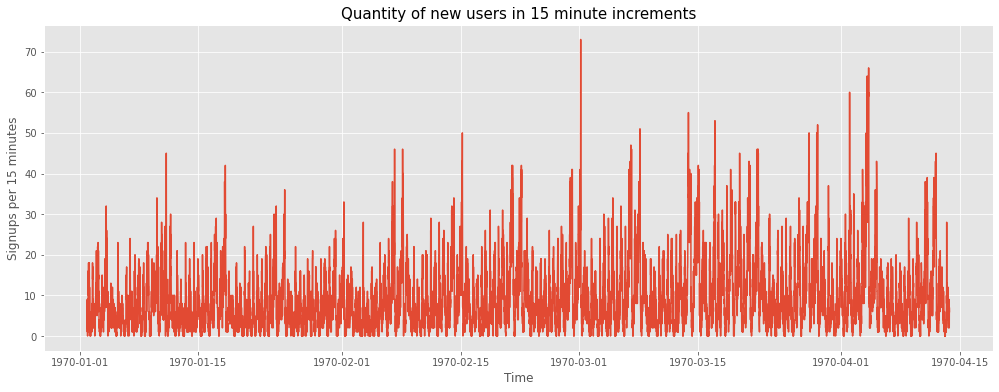

In [5]:
f, ax = plt.subplots()
plt.plot(agg_15m.index,
         agg_15m['total_quantity'])
plt.ylabel('Signups per 15 minutes')
plt.xlabel('Time')
ax.set_title('Quantity of new users in 15 minute increments', fontsize = 15)
# ax.set_xticks(agg_15m.index)
# plt.xticks(rotation = 90)

plt.show()

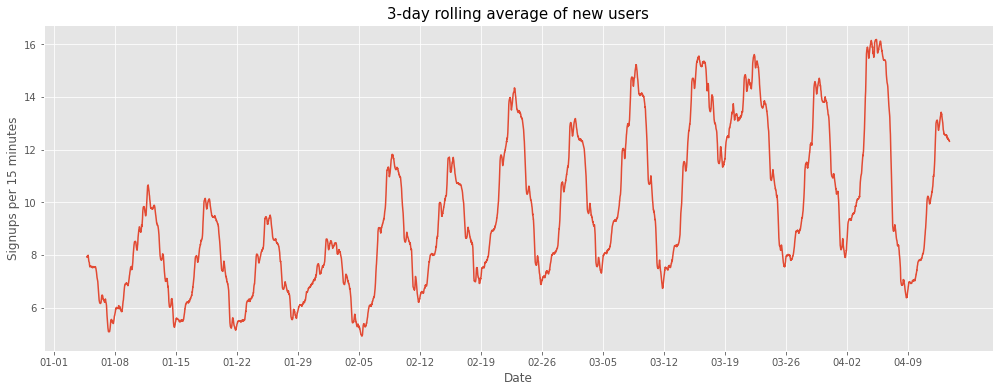

In [6]:
#All time 3-day moving average
f, ax = plt.subplots()
plt.plot(agg_15m.index,
         agg_15m['3_day_rolling_avg'])
plt.ylabel('Signups per 15 minutes')
plt.xlabel('Date')
ax.set_title('3-day rolling average of new users', fontsize = 15)
ax.set_xticks(ticks[::7])
ax.set_xticklabels(tick_labels[::7])
# plt.xticks(rotation = 90)
plt.show()

In [7]:
#Our 3-day rolling average smooths out the data enough that we can see an overall trend, and 
#a local trend. Seems like roughly 4 peaks per month, let's plot one month to find out. 

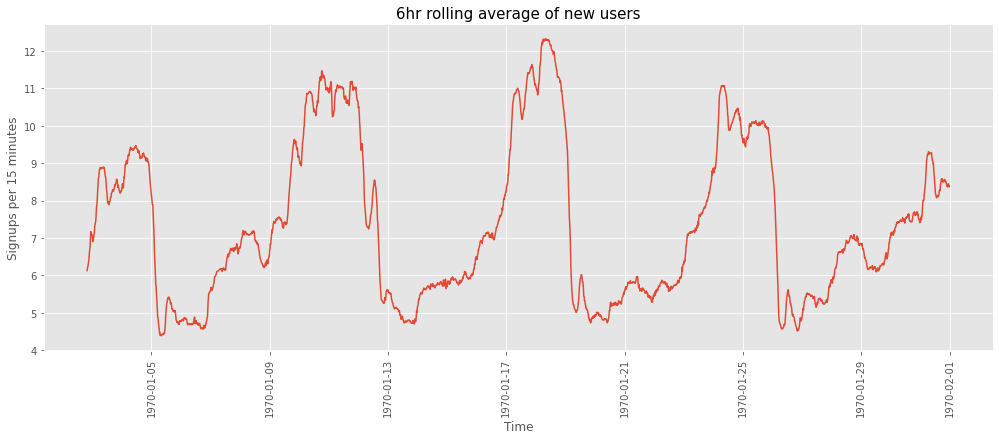

In [8]:
#One month plot
f, ax = plt.subplots()
plt.plot(agg_15m[agg_15m['time2'].dt.month == 1].index,
         agg_15m[agg_15m['time2'].dt.month == 1]['24h_rolling_avg'])
plt.ylabel('Signups per 15 minutes')
plt.xlabel('Time')
ax.set_title('6hr rolling average of new users', fontsize = 15)
# ax.set_xticks(ticks[ticks.dt.month ==1])
# ax.set_xticklabels(tick_labels)
plt.xticks(rotation = 90)
plt.show()


In [9]:
#One month plot does indeed show about 4 peaks, meaning this is probably a weekly trend. Let's
#plot all the weeks on one mon-sun graph to see this trend in action

<ipython-input-10-d08f100291ff>:12: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  total_weeks = max(df.index.week)
<ipython-input-10-d08f100291ff>:14: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  for name, group in df.groupby(df.index.week):
<ipython-input-10-d08f100291ff>:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(weekday_names)


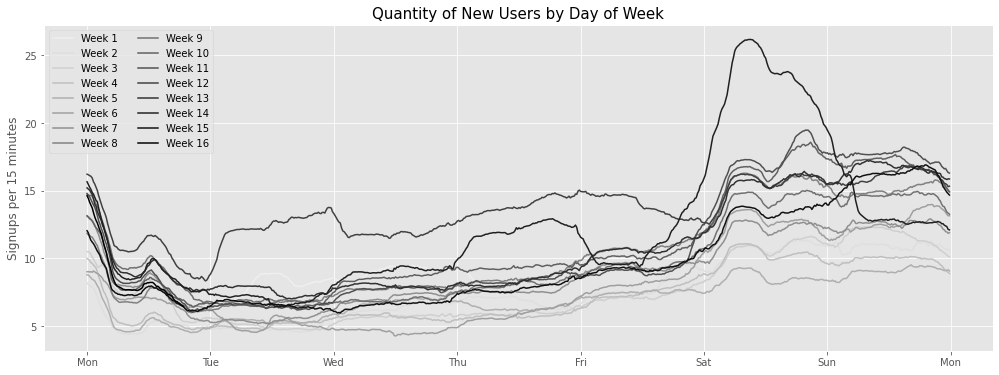

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

n = agg_15m.index
df = agg_15m
df['A'] = df['24h_rolling_avg']

#list of names for xtick labels. Extra Monday for end.
weekday_names = "Mon Tue Wed Thu Fri Sat Sun Mon".split(' ')
total_weeks = max(df.index.week)
fig, ax = plt.subplots()
for name, group in df.groupby(df.index.week):
    start_day= group.index.min().to_pydatetime()
    #convert date to week age
    Xs = mdates.date2num(group.index.to_pydatetime()) \
        - mdates.date2num(start_day)
    Ys = group.A
    ax.plot(Xs, Ys, color = str((total_weeks - name)/total_weeks), label = "Week " + str(name)) 
ax.set_title('Quantity of New Users by Day of Week', fontsize = 15)
plt.ylabel('Signups per 15 minutes')
plt.legend(loc='upper left', ncol=2)
ax.set_xticklabels(weekday_names)
ax.set_xticks(range(0, len(weekday_names)))

In [11]:
# Week graph shows that we get more signups on the weekends than on the weekdays, and overall 
# new signups have been increasing slowly on a week-by-week basis (which was better visualized 
# on the 3-day rolling average plot)


In [12]:
# Ultimate is interested in predicting rider retention. To help explore this question, we have 
# provided a sample dataset of a cohort of users who signed up for an Ultimate account in January 
# 2014. The data was pulled several months later; we consider a user retained if they were 
# “active" (i.e. took a trip) in the preceding 30 days.
# We would like you to use this data set to help understand what factors are the best predictors 
# for retention, and offer suggestions to operationalize those insights to help Ultimate.
# The data is in the attached file ultimate_data_challenge.json. See below for a detailed 
# description of the dataset. Please include any code you wrote for the analysis and delete the 
# dataset when you have finished with the challenge.
# 1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data 
# for this analysis (a few sentences/plots describing your approach will suffice). What fraction 
# of the observed users were retained?

# 2. Build a predictive model to help Ultimate determine whether or not a user will be active in 
# their 6th month on the system. Discuss why you chose your approach, what alternatives you 
# considered, and any concerns you have. How valid is your model? Include any key indicators of 
# model performance.
# 3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve 
# its long term rider retention (again, a few sentences will suffice).

In [13]:
import pandas as pd
import json
from sklearn import preprocessing
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,log_loss
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score
import seaborn as sns

In [40]:
df = pd.read_json('/Users/olivianystrom/Desktop/Springboard/ultimate_challenge/ultimate_data_challenge.json')
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [41]:
df.isna().any()
#there are NaN values in avg_rating_of_driver, phone, and avg_rating_by_driver

df['signup_date'].min()
df['signup_date'].max()
df['last_trip_date'].min()
df['last_trip_date'].max()
df['signup_date'] = pd.to_datetime(df['signup_date'], format= '%Y-%m-%d')
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'], format= '%Y-%m-%d')
# the dates make sense based on the background information provided so no cleanup is needed there
# We also can see that the latest trip date in our dataset is 2014-07-01. Taking this as the
# date the data is pulled, any users with a last trip date taken in the preceding 30 days will be
# considered active
df['active'] = np.where(df['last_trip_date'] >= datetime.strptime('2014-06-01', '%Y-%m-%d'), 1, 0)
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0


In [43]:
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'city'.
df['city_encoded']= label_encoder.fit_transform(df['city'])



ValueError: Length of values (49604) does not match length of index (50000)

In [86]:
city_stats = no_nan_df.groupby('city_encoded').agg({'active' : ['sum', 'count']})
city_stats['pct_active'] = city_stats[('active',   'sum')]/city_stats[('active', 'count')]
city_stats

active        pct_active
                sum  count           
city_encoded                         
0              3829  13509   0.283441
1              5736   8775   0.653675
2              7470  19161   0.389854

In [44]:
#removing the rows with missing data. Will use this to determine if the columns with NA values 
#are significant
no_nan_df = df.dropna()
no_nan_df['phone_encoded'] = label_encoder.fit_transform(no_nan_df['phone'])

<ipython-input-44-3d2ad351ed37>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_nan_df['phone_encoded'] = label_encoder.fit_transform(no_nan_df['phone'])


In [45]:
#looking at the summary stats grouped by active status to determine the important indicators
print(no_nan_df[['trips_in_first_30_days', 'active']].groupby('active').describe())
print(no_nan_df[['avg_rating_of_driver', 'active']].groupby('active').describe())
print(no_nan_df[['avg_surge', 'active']].groupby('active').describe())
print(no_nan_df[['surge_pct', 'active']].groupby('active').describe())
print(no_nan_df[['weekday_pct', 'active']].groupby('active').describe())
print(no_nan_df[['avg_dist', 'active']].groupby('active').describe())
print(no_nan_df[['avg_rating_by_driver', 'active']].groupby('active').describe())
print(no_nan_df[['city_encoded', 'active']].groupby('active').describe())
print(no_nan_df[['phone_encoded', 'active']].groupby('active').describe())

#trips_in_first_30_days, surge_pct, weekday_pct, avg_distance, city_encoded, phone_encoded look 
#interesting

       trips_in_first_30_days                                               
                        count      mean       std  min  25%  50%  75%    max
active                                                                      
0                     24410.0  1.935477  2.914006  0.0  0.0  1.0  2.0   73.0
1                     17035.0  3.575756  5.132168  0.0  0.0  2.0  5.0  125.0
       avg_rating_of_driver                                             
                      count      mean       std  min  25%  50%  75%  max
active                                                                  
0                   24410.0  4.607808  0.662614  1.0  4.3  5.0  5.0  5.0
1                   17035.0  4.592997  0.542454  1.0  4.3  4.8  5.0  5.0
       avg_surge                                              
           count      mean       std  min  25%   50%  75%  max
active                                                        
0        24410.0  1.074517  0.229827  1.0  1.0  1.00  1.0  8.

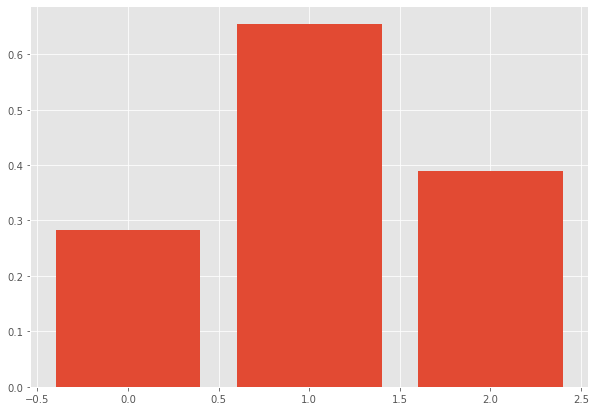

In [97]:
#graphing trips_in_first_30_days, surge_pct, weekday_pct, avg_dist, city_encoded, phone_encoded
#to make sure they seem relevent for my analysis

fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)

plt.bar(city_stats.index, city_stats['pct_active'])



# ax.boxplot(no_nan_df[no_nan_df['active'] == 1]['avg_dist'])

# ax.boxplot(no_nan_df[no_nan_df['active'] == 0]['trips_in_first_30_days'])
# ax.boxplot(no_nan_df[no_nan_df['active'] == 1]['trips_in_first_30_days'])
# plt.boxplot(no_nan_df['active'], no_nan_df['avg_dist'])
plt.show()

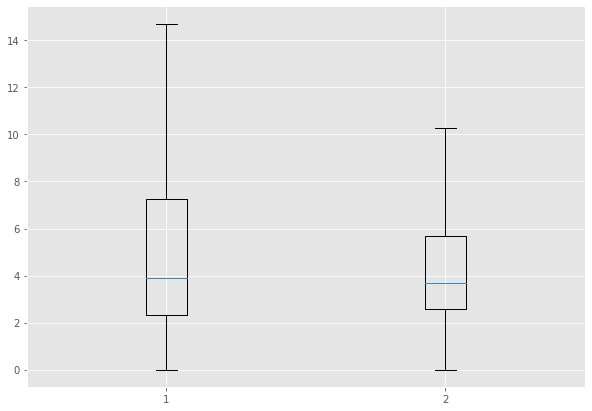

In [100]:
fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)

ax.boxplot([no_nan_df[no_nan_df['active'] == 0]['avg_dist'], 
            no_nan_df[no_nan_df['active'] == 1]['avg_dist']], showfliers=False)

plt.show()

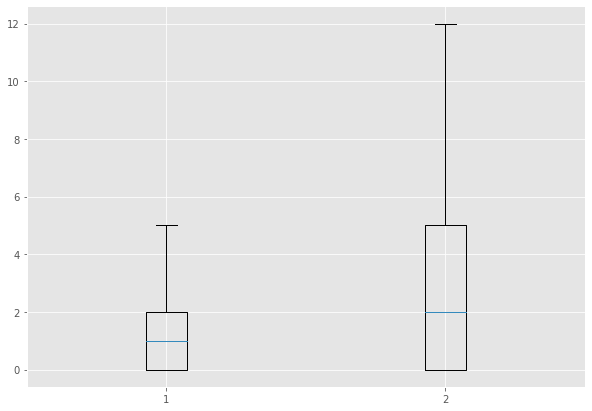

In [99]:
fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)
ax.boxplot([no_nan_df[no_nan_df['active'] == 0]['trips_in_first_30_days'], 
            no_nan_df[no_nan_df['active'] == 1]['trips_in_first_30_days']], showfliers=False)
plt.show()

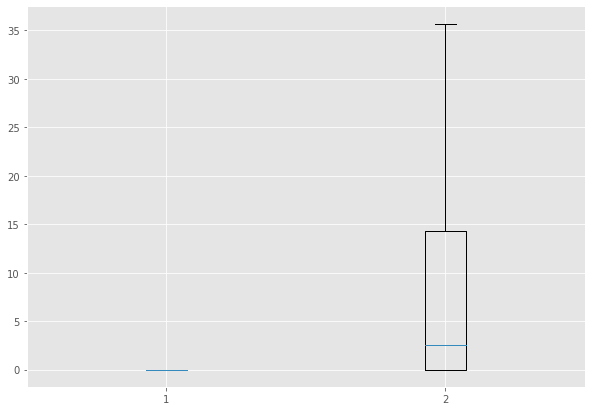

In [98]:
fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)
ax.boxplot([no_nan_df[no_nan_df['active'] == 0]['surge_pct'], 
            no_nan_df[no_nan_df['active'] == 1]['surge_pct']], showfliers=False)
plt.show()

In [101]:
X_train, X_test, y_train, y_test = train_test_split(no_nan_df[['trips_in_first_30_days', 'surge_pct', 'weekday_pct', 'avg_dist', 'city_encoded', 
       'phone_encoded']], no_nan_df[['active']], 
       test_size=0.33, random_state=42)

In [103]:
clf = RandomForestClassifier(n_estimators=400, random_state = 1,n_jobs=-1)
model_res = clf.fit(X_train, y_train)
y_pred = model_res.predict(X_test)
y_pred_prob = model_res.predict_proba(X_test)

ac = accuracy_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred, average='weighted')

print('Random Forest: Accuracy=%.3f' % (ac))

print('Random Forest: f1-score=%.3f' % (f1))

<ipython-input-103-8944e8b603d8>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_res = clf.fit(X_train, y_train)


Random Forest: Accuracy=0.724
Random Forest: f1-score=0.724


In [ ]:
#We managed about 72% accuracy in our predictive model with an f1-score of .73. We would want
#to try a few other classifiers before committing, but the variables included are the ones I 
#think are most significant